In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.species= df.species.map({"setosa":0,"versicolor":1, "virginica":2 })

In [ ]:
from  sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(df.iloc[:,:-1], df.iloc[:, -1])


DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

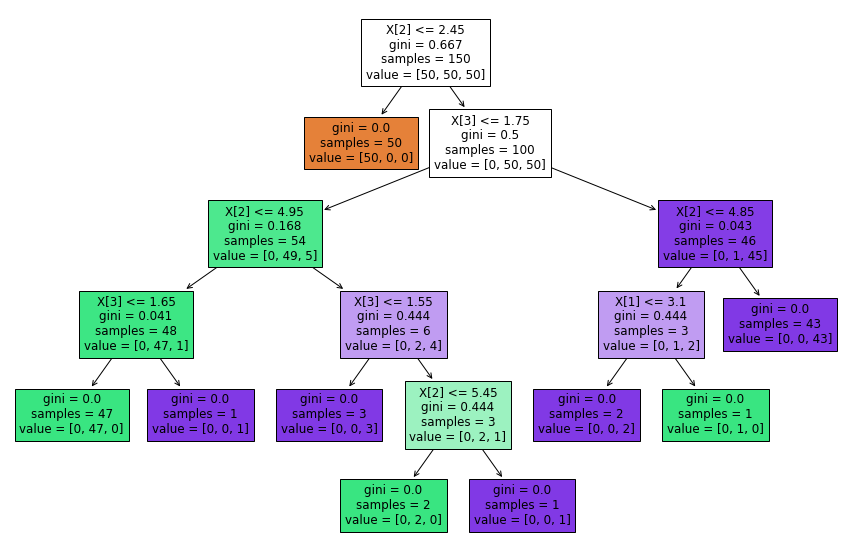

In [ ]:
from sklearn import tree
plt.figure(figsize= (15, 10))
tree.plot_tree(classifier, filled=True)

x[i] is the ith feature. 

Value [50, 50, 50] means at that node, setosa, vergenica, versicolor have 50 samples each. 

Samples represent how many sample lie below say x[i]<1

Post prunning- we can prune this tree and have it only till depth =2 (i.e. x[2]<=4.95 level). Because after x[3]<=1.75, we can classify the left one as versicolor (49 samples) and right as virginica (45 samples)

In [ ]:
from  sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(max_depth=2)
classifier.fit(df.iloc[:,:-1], df.iloc[:, -1])


DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

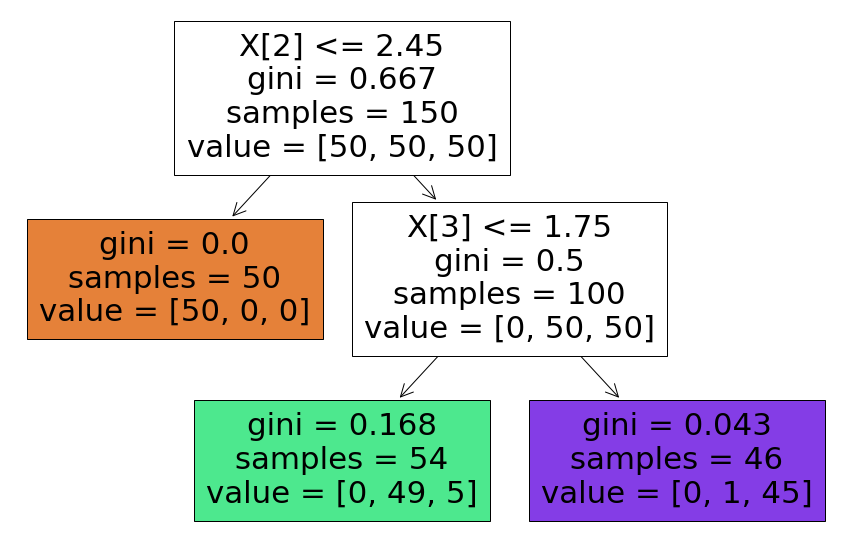

In [ ]:
from sklearn import tree
plt.figure(figsize= (15, 10))
tree.plot_tree(classifier, filled=True)

##preprunning using GridserachCV 

###and ecample of decision tree regressor

In [ ]:
params= {'max_depth':[1, 2, 4, 5, 7, 10], 
          'min_saples_split':[2, 3,4],
            'min_samples_leaf':[1,2]}

from sklearn.model_selection import GridSearchCV

gcv= GridSearchCV(classifier, params)